# Building a Graph with Errors

In this example we will build a graph with errors, display it and save it as an image.

First declare the values and the errors on the Y axis.

In [1]:
const int n_points = 10;

double x_vals[n_points] = {1,2,3,4,5,6,7,8,9,10};
double y_vals[n_points] = {6,12,14,20,22,24,35,45,44,53};
double y_errs[n_points] = {5,5,4.7,4.5,4.2,5.1,2.9,4.1,4.8,5.43};

Create the instance of the graph.

In [2]:
TGraphErrors graph(n_points, x_vals, y_vals, nullptr, y_errs);
graph.SetTitle("Measurement XYZ;lenght [cm];Arb.Units");

Make the plot look better.

In [3]:
graph.SetMarkerStyle(kOpenCircle);
graph.SetMarkerColor(kBlue);
graph.SetLineColor(kBlue);

Create the canvas on which we'll draw the graph.

In [4]:
auto mycanvas = new TCanvas();

Draw the graph.

In [5]:
graph.DrawClone("APE");

Define a linear function.

In [6]:
TF1 f("Linear law", "[0]+x*[1]", .5, 10.5); 

Let's make the funcion line nicer.

In [7]:
f.SetLineColor(kRed);
f.SetLineStyle(2);

Now fit the function to the graph and draw it.

In [8]:
graph.Fit(&f);
f.DrawClone("Same");

 FCN=3.84883 FROM MIGRAD    STATUS=CONVERGED      31 CALLS          32 TOTAL
                     EDM=5.96982e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.01604e+00   3.33409e+00   1.48321e-03  -8.98235e-12
   2  p1           5.18756e+00   5.30717e-01   2.36095e-04   9.40487e-12


Build and draw a legend.

In [9]:
TLegend leg(.1, .7, .3, .9, "Lab. Lesson 1");
leg.SetFillColor(0);
graph.SetFillColor(0);
leg.AddEntry(&graph, "Exp. Points");
leg.AddEntry(&f, "Th. Law");
leg.DrawClone("Same");

Draw an arrow on the canvas.

In [10]:
TArrow arrow(8, 8, 6.2, 23, 0.02, "|>");
arrow.SetLineWidth(2);
arrow.DrawClone();

Add some text to the plot.

In [11]:
TLatex text(8.2, 7.5, "#splitline{Maximum}{Deviation}");
text.DrawClone();

Display in the notebook what is in your canvas.

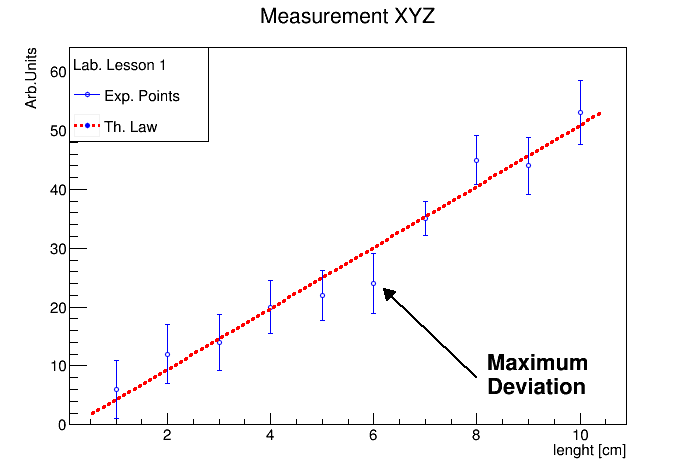

In [12]:
mycanvas->Draw();

Save the content of your canvas to an image file on disk.

In [14]:
mycanvas->Print("graph_with_law.pdf");

Info in <TCanvas::Print>: pdf file graph_with_law.pdf has been created
